 # <center>Lecture 2: Bayes' Rule  </center>  
 
 ## <center> Instructor: Dr. Hu Chuan-Peng  </center>

## Part 1: 【和鲸平台】整合教学+练习

### 和鲸平台

https://www.heywhale.com/mw-org/NNUPsy/workspace/index  

进入网址注册后：

![Image Name](https://cdn.kesci.com/upload/s0vfx2ld9v.png?imageView2/0/w/1280/h/1280)

![Image Name](https://cdn.kesci.com/upload/s0vfy0fzn1.png?imageView2/0/w/1280/h/1280)

![Image Name](https://cdn.kesci.com/upload/s0vfyo1fhv.png?imageView2/0/w/1280/h/1280)

![Image Name](https://cdn.kesci.com/upload/s0vfzqio5j.png?imageView2/0/w/1280/h/1280)

更重要的是：任何问题都可以微信群或者平台里发帖提问。 

助教和老师会尽快回复的 🚀。

![Image Name](https://cdn.kesci.com/upload/s0vhsizi3f.png?imageView2/0/w/640/h/640)

![Image Name](https://cdn.kesci.com/upload/s0vhookjac.png?imageView2/0/w/640/h/640)

 ## Part 2: 单一事件的贝叶斯模型

**“假新闻”**  

《柯林斯词典》将“假新闻 (fake news)”列为2017年度词汇。虚假新闻随着在线新闻和社交媒体平台的出现而激增，这些平台允许用户在几乎没有质量控制的情况下发布文章。  

因此，**我们需要你来扮演“实施核查员 (fact-checker)”帮助读者将文章标记为“真实”或“虚假”**。  

我们将探索贝叶斯哲学如何帮助我们区分不同性质的文章。  

- 为此，我们将对发布在Facebook上的150篇文章进行抽样调查  
- 这些文章由五名BuzzFeed记者事先进行了事实核查。
  - 国外著名的事实核查网站 https://www.snopes.com/; https://www.factcheck.org/.

![Image Name](https://cdn.kesci.com/upload/s0vgmzp3o2.png?imageView2/0/w/600/h/600)  

> source: 微信小程序，微信辟谣助手，2023.9.12

以下代码展示了部分数据，包括新闻的标题 (tiltle)，网址 (url)，作者 (author) 和文章标记 (type)

In [ ]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt

# 使用 pandas 导入示例数据
try:
  fake_news = pd.read_csv("/home/mw/input/bayes20238001/fake_news.csv")
except:
  fake_news = pd.read_csv('data/fake_news.csv')
fake_news = fake_news[['title', 'url', 'authors', 'type', 'title_has_excl']]

In [3]:
# 仅显示数据的前5行
fake_news.head()

,title,url,authors,type,title_has_excl
0,Clinton's Exploited Haiti Earthquake ‘to Steal...,http://freedomdaily.com/former-haitian-senate-...,NaN,fake,False
1,Donald Trump Jr. Just Pinned A Tweet So Stupid...,http://winningdemocrats.com/donald-trump-jr-ju...,NaN,real,False
2,Michelle Obama NOT Leaving The White House – H...,http://rightwingnews.com/top-news/michelle-oba...,Sierra Marlee,fake,True
3,Trump hits Clinton on Islamic State: ‘It is ti...,http://politi.co/2cEsAnL,"Jack Shafer,Nolan D",real,False
4,Australia Voted To Ban Muslims And Liberals Ar...,https://goo.gl/p7jFZG,Blair Patterson,fake,False


### 先验 (prior) 和 数据 (data) 的差异  

#### 先验  

通过查看数据集，我们可以发现这份数据集中，40%的报道是假新闻，60%的报道是事实。  

我们可以将其作为一种先验经验，即我们从这个数据中看到的新闻，有40%的为假新闻。  

- 需要注意的是，先验可以是主观经验。例如，有的人可能认为50%的新闻为虚假新闻。也有人会根据某些数据而生成自己独特的先验，如本示例中的40%。  
- 先验的关键是，在*当前事件*发生之前，对事件发生的事先猜测或推断。例如，我们看见一篇*新发布*的文章，其标题为：“总统有一个有趣的秘密！”。该新闻就是当前事件，其为虚假信息的概率有别于我们对其的事先猜测。

In [4]:
# 计算不同水平的数量和百分比
level_counts = fake_news['type'].value_counts()
level_percentages = fake_news['type'].value_counts(normalize=True) * 100
# 创建一个新的 DataFrame 合并结果
result_df = pd.DataFrame({'数量': level_counts, '百分比': level_percentages})
# 展示结果
result_df

,数量,百分比
real,90,60.0
fake,60,40.0


#### 数据  

之前的信息只考虑了事实报道和虚假新闻的比率，只凭借这一简单的比率信息，我们仍然对当前出现新闻的真假而不自知。  

一个有趣的现象是，标题使用*惊叹号*的新闻，往往是虚假新闻。例如：“总统有一个有趣的秘密！”。  


![Image Name](https://cdn.kesci.com/upload/s0vgueuw94.png?imageView2/0/w/600/h/300) 

> source: 微信小程序，微信辟谣助手，2023.9.11

我们的**数据**也支持这一点，通过查看数据集可发现，26.67%（16/60）的假新闻标题使用感叹号，但只有2.22%（2/90）的真实新闻标题使用惊叹号：

In [5]:
# 计算不同水平的数量
result_df = fake_news.groupby(['type', 'title_has_excl']).size().unstack()
# 结果
result_df

title_has_excl,False,True
type,,
fake,44,16
real,88,2


#### 先验 vs 数据  

现在，我们获得了两种信息：先验信息(prior)表明大部分的报道是事实(60%)，而惊叹号数据(data)表明使用惊叹号的更可能是假新闻(26.67%)。  

我们如何结合两种信息进行推断？ 如何在两种信息间进行权衡？  

这就是贝叶斯学派关注的问题。  

![Image Name](https://www.bayesrulesbook.com/chapters/figs/chapter_2/fake_news_diagram.png)  


$$  
Posterior = \frac {data * \, prior}{Average \, probability \, of \, data}  
$$  


#### 先验概率模型(Prior probability model)  

首先，我们将一篇文章真实性的概率进行形式化  

$$  
P(B) = 0.40 \\  

P(B^{c}) = 0.60  
$$  

$B$表示一篇报道为假新闻的概率，$B^{c}$则表示一篇报道非假新闻的概率($B^{c}:B$ complement)



| 事件	    |$B$         |$B^{c}$ |Total|  
|---------- |------------|--------|-----|  
|probability|0.4         |0.6     |1    |  



**$P(B)$** 和 **$P(B^{c})$** 构成了新闻真实性概率的先验模型(prior model)  

作为一个有效的概率模型(valid probability model)，它必须：  

（1）考虑所有可能的事件（所有文章都必须是假的或真的，没有其他可能性）；  

（2）它为每个事件分配先验概率；  

（3）这些概率加起来为1。

### 条件概率&似然  

**形式化数据结果**  

在第二步中，我们将对数据结果(data)进行形式化。  

我们从标题带有感叹号新闻的数据中得知，  

- 如果一篇报道是假新闻，其标题出现感叹号的概率是26.67%；  
- 如果一篇报道为事实，其标题出现感叹号的概率是2.22%。  

所以感叹号的出现依赖于报道的性质，或者可以说以报道的性质为前提条件。  

我们可以用条件概率的形式来表示感叹号出现的可能性。  
$$  
P(A|B) = 0.2667  
$$  
$$  
P(A|B^{c}) = 0.0222  
$$

#### 条件概率  

条件概率表示为$P(A|B)$，表示“A在B发生的条件下发生的概率”  

在贝叶斯统计中，条件概率是一个非常关键的概念。$P(A|B)$与$P(A)$的对比，表示事件B的发生如何影响我们对事件A的认知  

1. 在一些时候，事件B发生可能使得事件A发生的可能性增加，例如，每天练习单簧管的人加入管弦乐队的概率高于一般人群，即：  
$$  
P(加入管弦乐队|练习) > P(加入管弦乐队)  
$$  

2. 而有些时候，事件B的发生则可能使得事件A发生的可能性降低，例如，如果你每天洗手，那么你得流感的几率可能小于一般人群，即：  
$$  
P(得流感|洗手) < P(得流感)  
$$  

3. 并且注意$P(A|B) \neq P(B|A)$ \  
比如，所有的小狗都是可爱的，但可爱的却不一定全是小狗  
$$  
P(可爱的|小狗) = 1  
$$  

$$  
P(小狗|可爱的) < 1  
$$  

4. 当A与B相互独立时，B的发生则不会影响我们对A事件的认知  
$$  
P(A|B) = P(A)  
$$

#### 似然(likelihood)  

**似然的定义**  

回到感叹号新闻标题的例子，我们所获得的数据(data)只是告诉我们这篇文章的标题出现了感叹号，而根据条件概率的信息可知，$P(A|B) = 0.2667，P(A|B^{c}) = 0.0222$，标题含有感叹号的文章更可能(more likely)是假新闻。  

也就是说，我们知道当前的数据更可能在某一种假设下出现。在这个例子中，我们比较不同假设下当前数据出现的可能性  
$P(A|B) = 0.2667 > P(A|B^{c}) = 0.0222$ 来确定当前数据在不同假设下发生的相对可能性  

--------------------------------------------------------------------  

这就是似然函数(likelihood function)的含义，它表明了数据A在各种假设下出现的概率，它是一系列条件概率的组合  

如针对“数据A:新闻标题含有感叹号” 的似然函数可以写成：$L(·|A)$  
$$  
L(B|A) = P(A|B) \quad\quad L(B^{c}|A) = P(A|B^{c})  
$$  
这表明了标题含有感叹号在“假新闻”与“事实报道”这两种假设下出现的概率  

*注意，在似然函数中，数据是已知发生的，而假设是可能发生的  


### 概率(Probability) vs 似然(likelihood)  

当假设$B$是已知的，条件概率函数$P(·|B)$允许我们比较在假设$B$发生的前提下，各种可能事件$A$或$A^{c}$发生的概率。  

当事件$A$已经发生，似然函数$L(·|A)= P(A|·)$允许我们比较在各种假设$B$或$B^{c}$下，事件$A$发生的概率。  

-----------------------------------------------------------  

下表对以上的信息做了一个总结，注意：  
* 先验概率的总和等于1  
* 似然总和不等于1  
似然函数并不是概率函数(likelihood function is not a probability function),因为它告诉我们事件A在不同假设下发生的相对可能性，在这里$L(B|A) > L(B^{c}|A)$  

TABLE 2.2: Prior probabilities and likelihoods of fake news.  

| event   |   B       | $B^c$  | Total   |  
| -------- | -------- | --------  | -------- |  
| prior.   | 0.4      | 0.6      | 1          |  
| likelihood | 0.2667 | 0.0222 | 0.2889 |

### 分母（normalizing constant）-- **边际概率 (marginal probability)**  

似然函数有效总结了在真假新闻中的感叹号使用，但我们仍然需要得知，在所有新闻标题中使用感叹号的概率如何, 这被称为边际概率 $P(A)$  


$$  
Posterior \sim P(B|A) = \frac {data * prior}{Average probability of data} = \frac{P(A\cap B)}{P(A)} = \frac{L(B|A) * P(B)}{P(A)}  
$$  
 
所有新闻标题中使用惊叹号的概率可被分为两部分：  

1. 假新闻的标题出现感叹号，即$P(A\cap B)$  
2. 事实报道的标题出现感叹号$P(A\cap B^{c})$  

两者之和即为边际概率。  
$$  
 P(A) = P(A \cap B) + P(A \cap B^{c}) = L(B|A) * P(B) + L(B^{c} | A) * P(B^{c})  
$$

$$ P(A) = 0.2667 * 0.4 + 0.0222 * 0.6 = 0.12  $$  


### 后验概率模型(Posterior probability model via Bayes’ Rule)

**直觉理解**  

现在，我们来尝试计算后验概率，比如计算标题使用感叹号的文章是假新闻的概率$P(B|A)$。  

在正式计算之前，我们可以回顾一下这个表格来建立一些直觉。  


||$B$|$B^c$|Total|  
|---|---|---|---|  
|$A$|0.1067|0.0133|0.12|  
|$A^c$|0.2933|0.5867|0.88|  
|Total|0.4|0.6|1|  

 

因为这篇文章标题使用了感叹号，所以我们直接锁定A行，  
- 在A行中，88.9%(0.1067/0.12)的文章为假新闻，11.1%(0.0133/0.12)的文章为事实。  
- 因此有88.9%的后验概率认为当前这一文章属于假新闻。  


**正式计算**  

如何凭借贝叶斯公式的数学形式推导得到该结果？  

$$  
Posterior \sim P(B|A) = \frac {data * prior}{Average \, probability \, of \, data} ={\frac{P(A\cap B)}{P(A)}}={\frac{L(B|A) * P(B)}{L(B|A) * P(B) + L(B^{c}|A) * P(B^{c})}}  
$$  

- $P(B|A)={\frac{P(B)L(B|A)}{P(A)}}={\frac{0.4\cdot0.2667}{0.12}}=0.889$  
- 当带入之前计算得到的数值到贝叶斯公式中，我们得到了标题带有惊叹号的新闻为虚假新闻的概率。  

使用同样的方法，我们可以计算出不标题带有惊叹号的新闻为虚假新闻的概率，结果如下表。  
- 可以注意到：先验概率和后验概率的和均等于1。  

TABLE 2.4: The prior and posterior models of fake news.  


| event    | $B$     | $B^c$ | Total    |  
| --------  | -------- | -------- | -------- |  
| prior probability | 0.4 | 0.6 | 1 |  
| posterior probability | 0.889 | 0.111 | 1 |  


思考时间🧐：是否加入分母进行计算，在哪种情况下后验概率之和不为1？

### 后验模拟(Posterior simulation)  

如何使用代码实现后验概率的计算？


👀 如果对以下代码不太熟悉，可以先学习 2. python数据操作基础教程 
![Image Name](https://cdn.kesci.com/upload/s0vfx2ld9v.png?imageView2/0/w/1280/h/1280)

1. 定义文章类型与相应的先验概率

In [6]:
# 定义文章类型
article = pd.DataFrame({'type': ['real', 'fake']})

# 定义先验概率
prior = [0.6, 0.4]

2. 模拟一些可能被投放给你的文章

In [7]:
# 模拟生成 10000 文章，包括其类型
np.random.seed(84735)
article_sim = article.sample(n=10000, weights=prior, replace=True)
# 查看前 10 行数据
article_sim.head(10)

,type
0,real
1,fake
1,fake
1,fake
1,fake
0,real
1,fake
1,fake
1,fake
0,real


In [8]:
#我们可以通过画图来查看这些被投放的文章中，事实报道和假新闻的比例。
article_sim['type'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

<Figure size 432x288 with 1 Axes>

3. 接下来我们需要模拟10000篇新闻标题的感叹号使用情况，  
- 和之前相同，假新闻使用感叹号的可能性为26.67% ，  
- 事实报道使用感叹号的可能性为2.22% 

In [11]:
article_sim['data_model'] = np.where(article_sim['type'] == 'fake', 0.2667, 0.0222)

# 定义新闻标题是否使用惊叹号
data = ['yes', 'no']

# 设置随机种子，以便得到重复的结果
rng=np.random.default_rng(84735)
# 生成惊叹号相关的数据
article_sim['usage'] = article_sim.apply(lambda x: rng.choice(data, 1, p = [x.data_model, 1-x.data_model])[0], axis=1)

In [12]:
# 显示每个类别新闻数量
(
  article_sim.groupby(['usage', 'type'])
    .size()
    .unstack(fill_value=0)
)

type,fake,real
usage,,
no,2899,5937
yes,1039,125


4. 计算后验值  

还记得我们的先验概率为：  
- 真实报道 $P(B^c)=0.6$,  
- 虚假新闻 $P(B)=0.4$  

由以上结果可计算似然：  
- 2%的真实报道使用了感叹号(125/(125+5937)), $P(A|B^c)=0.02$;  
- 大约26%(1039/(1039+2899))的假新闻标题使用了感叹号, $P(A|B)=0.26$  

结合先验和似然，我们可以进一步计算分母(边际概率)：  
- $L(B|A)*P(B) + L(B^{c}|A)*P(B^{c}) = 0.26*0.4 + 0.02*0.6 = 0.116$  

最后，我们可以计算的到后验 (带有感叹标题的新闻中，虚假新闻的概率)：  
- $P(B|A) ={\frac{L(B|A)*P(B)}{P(A)}}= (0.26*0.4)/0.116 = 89\%$  
- 在10000篇新闻中，标题使用感叹号新闻有1164篇(分母)  
- 而现在，我们可以知道，在使用感叹号标题的文章中，89%(1039/1164)的文章为假新闻

In [13]:
usage_yes = article_sim[article_sim['usage'] == 'yes']
print('标题使用感叹号的新闻', usage_yes['type'].value_counts().sum())
usage_yes['type'].value_counts()

标题使用感叹号的新闻 1164


fake    1039
real     125
Name: type, dtype: int64

同样地，通过画图来可视化真假新闻中感叹号的使用情况

In [14]:
# 定义两幅图的坐标
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 绘制两幅图
for i, u in enumerate(article_sim['usage'].unique()):
    ax = axes[i]
    data = article_sim[article_sim['usage'] == u]
    ax.bar(data['type'].unique(), data['type'].value_counts())
    ax.set_title(f'usage = {u}')
    ax.set_ylim(0, 10000) 

# 显示   
fig.tight_layout()
plt.show()

<Figure size 720x360 with 2 Axes>

### 总结 (Recap)

回到之前的问题：如何判断新闻的真实性？
- 哪些信念可以作为先验概率？
- 信息的哪些属性可以作为数据？
- 如何结合先验和数据更新信念 (贝叶斯公式)。
- 如何通过 python 实现以上的计算？

### Review


![Image Name](https://cdn.kesci.com/upload/s14m7y5df0.png?imageView2/0/w/960/h/960)

![Image Name](https://cdn.kesci.com/upload/s14m8e4di1.png?imageView2/0/w/960/h/960)

## Part3 随机变量的贝叶斯模型

**随机变量 (random variables)**  

在上面的分析中，我们针对“新闻类型”这种随机事件进行分析。接下来我们会针对更加抽象和一般性的**随机变量**进行贝叶斯分析

在这部分中，我们关注一个棋手对战机器的例子。  

1996年，国际象棋冠军Kasparov和IBM的超级电脑“深蓝”进行了对决。这次对决共有6场比赛，Kasparov的战绩为赢了三局，平局两局，输了一局。到了1997年，二者再次进行对决。  

首先我们来了解一个概念，胜率

* 想象你玩斗地主，有五局三胜，七局四胜这一说，一轮玩下来，就会出现胜率。
* 这个胜率是会变化的，今天赢得多明天输得多
* 在每一轮开始前，你并不知道你这次的胜率是多少

象棋也是这样，假设Kasparov在任何比赛中的胜率为$\pi$，$\pi$是**未知的且会随着时间波动**，所以$\pi$是一个随机变量。  

![Image Name](https://cdn.kesci.com/upload/s0rx4qqsv1.jpg?imageView2/0/w/640/h/640)  
> source: Five computers that changed the world https://www.crn.com.au/tools/print.aspx?ciid=323641

In [ ]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入统计建模工具包 scipy.stats 为 st
import scipy.stats as st 

# 设置 matplotlib 样式为 apa
import matplotlib.style as mplstyle
mplstyle.use('../input/apa.mplstyle')

**特定胜率下的获胜结果**

现在到了1997年，Kasparov要进行6场对决

根据 Kasparov 在 1996 年的战绩，我们进行猜测，他的胜率为 $\pi = 50\%$ (六局三胜)。

但比赛还没开始，每一种获胜结果都是有可能的。

他接下来可能获胜的次数Y可能是0，可能是1，也可能是6，我么知道有7种可能的获胜次数，Y \in \{0,1,2,3,4,5,6\}，那么每一种结果的可能性分别是多少呢？  

**二项模型公式**  

Kasparov的胜率为$\pi$，$在\pi$下某获胜次数发生的概率可表示为：

$$  
f(y|\pi) = \binom{n}{y} \pi^{y}(1-\pi)^{n-y} \quad\quad for\;y \in \{0,1,2,...,n\}  
$$  
$$  
\binom{n}{y} = \frac{n!}{y!(n-y)!}  
$$  

$\pi$ 表示成功的可能性，$y$表示在$n$个试次中成功的次数，二项模型含有的前提假设是：  

(1) 所有试次发生都是相互独立的  

(2) 在每个试次中，成功的概率都是一个固定的值$\pi$

比如，获胜次数为0~6 的可能性可以分别写成：

$$
f(Y=0|\pi=0.5) = \binom{6}{0} 0.5^0 (1-0.5)^{6}
$$
$$
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}
$$
$$
...
$$
$$
f(Y=5|\pi=0.5) = \binom{6}{5} 0.5^{5} (1-0.5)^{1}
$$
$$
f(Y=6|\pi=0.5) = \binom{6}{6} 0.5^{6} (1-0.5)^{0}
$$

---------------------------------

我们可以使用代码帮助计算
 `st.binom.pmf(y, n, p)`。其中 p 对应公式中的 $\pi$。

In [7]:
y = [0,1,2,3,4,5,6]  # 获胜次数 
n = 6                # 比赛总次数
p = 0.5              # 假设的获胜概率

# 计算概率值
prob = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({"获胜次数":y, "概率":prob})
result_table

,获胜次数,概率
0,0,0.015625
1,1,0.093750
2,2,0.234375
3,3,0.312500
4,4,0.234375
5,5,0.093750
6,6,0.015625


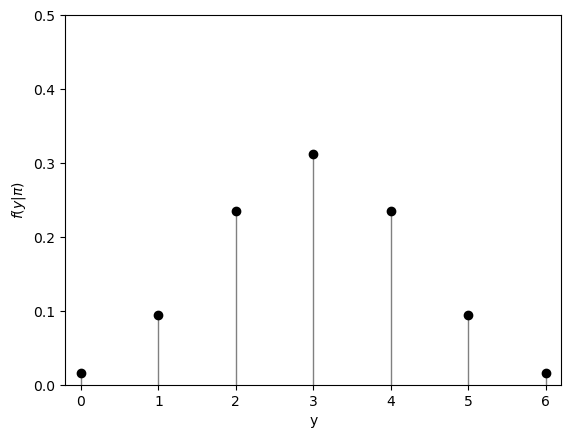

In [9]:
# 绘制灰色竖线
for i, j in zip(y , prob):
    plt.plot([i, i], [j, 0], 'gray', linestyle='-', linewidth=1, zorder=1, )

# 绘制黑色点(各胜率次数的胜率)
plt.scatter(y, prob, c='black')

plt.ylabel('$f(y|\pi)$')
plt.xlabel('y')

plt.xlim(-0.2,6.2)
plt.ylim(0,0.5)
plt.show()

*显然，当 Kasparov 获胜概率为 0.5 时，他在六场比赛中获得 y=3 场胜利的概率最高(p = 0.216)。*


**概率质量密度函数(probability mass function, pmf)：** 用来描述离散型随机变量在各特定取值上的概率  

在上图中我们看到，获胜次数y在不同的取值上的概率不同。

* 由于$y$的个数是有限的，并且是随机发生的，我们把$y$称为离散型随机变量，而$y$发生的概率$f(y)$则被称为概率密度函数


对于离散型随机变量$Y$，$Y$各取值的概率由$f(y)$指定：  
$$  
f(y) = P(Y=y)  
$$  

并且有如下性质：  

* 对所有y的取值来说，$0\leq f(y) \leq 1$  
* $\sum_{all\,\pmb{y}}f(y) = 1$，y取值的所有概率之和为1

In [10]:
sum(result_table['概率'])

0.9999999999999999

### 二项似然函数(The Binomial likelihood function)

**不同的信念**

然而，并不是所有人都只根据1996年的成绩，认为Kasparov的胜率为0.5。

比如：

- Kasparov 的支持者认为，Kasparov 的获胜概率为 0.8。
- “深蓝” 的支持者认为，Kasparov 的获胜概率仅为 0.2。  

Kasparov的获胜概率高，那六场比赛里他赢的次数多，反之，获胜概率低，那六场比赛里他输的次数多。

这样看来，“Kasparov的支持者” 和 “深蓝支持者” 对于 Kasparov在6场比赛中的获胜次数有着不同的设想。

我们可以计算两种支持者心中获胜次数的概率分布并画图。

In [1]:
y = [0,1,2,3,4,5,6]  # 获胜次数 
n = 6                # 比赛总次数

# 计算似然值
p = 0.5              # 根据以往战绩假设的获胜概率
likelihood1 = st.binom.pmf(y, n, p)
p = 0.8              # Kasparov支持者眼中的获胜概率
likelihood2 = st.binom.pmf(y, n, p)
p = 0.2              # 深蓝支持者眼中的获胜概率
likelihood3 = st.binom.pmf(y, n, p)

result_table = pd.DataFrame({
  "获胜次数":y, 
  "可能性":likelihood1, 
  "Kasparov支持者":likelihood2, 
  "深蓝支持者":likelihood3})
result_table

SyntaxError: invalid syntax (54530700.py, line 1)

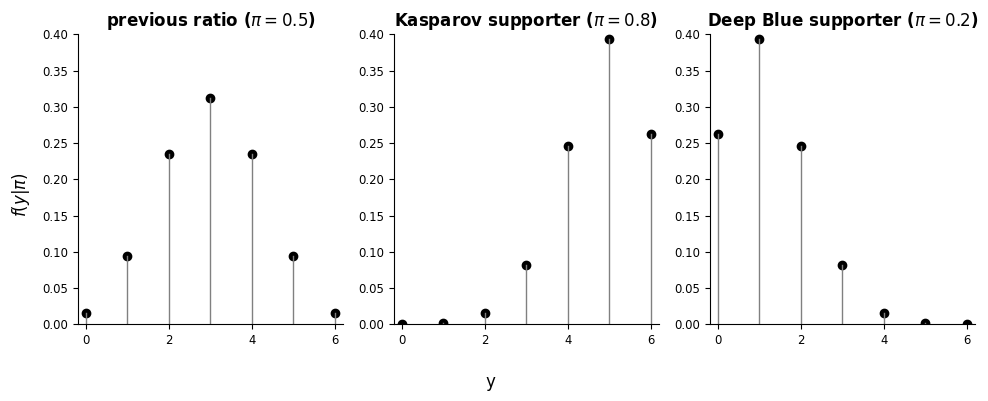

In [89]:
# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# 绘制三个图,每个子图类似原图
three_pi = ["previous ratio ($\pi = 0.5$)","Kasparov supporter ($\pi = 0.8$)","Deep Blue supporter ($\pi = 0.2$)"]
likelihoods = [likelihood1, likelihood2, likelihood3]
for i, ax in enumerate(axs):
    
    ax.scatter(y, likelihoods[i], c='black')
    
    for xx, yy in zip(y, likelihoods[i]):
        ax.plot([xx, xx], [yy, 0], 'gray', linestyle='-', linewidth=1, zorder=1)
    
    # 添加facet
    ax.set_title(three_pi[i])

    ax.set_xlim(-0.2,6.2)
    ax.set_ylim(0,0.4)

fig.supylabel('$f(y|\pi)$')
fig.supxlabel('y')
plt.tight_layout()
plt.show()

显然，对于Kasparov支持者来说， Kasparov获得六次胜利的概率远高于其他胜利次数。而对于深蓝支持者来说，Kasparov全败的可能性远高于其他胜利次数。

换句话说，若 Kasparov 在 1977 的比赛中仅获取一场胜利，这种情况在低胜率下更可能出现，在高胜率下几乎不可能出现。

那么Kasparov的胜率，更可能(likelihood)是深蓝支持者设想的那样($\pi = 0.2$)。

<center>

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/binom-chess-like-1.png)

</center>

- 在不同的支持者眼中(不同胜率$\pi$下)，6场比赛只获胜1次的似然(likelihood)。  

**似然函数**  

当Kasparov只获胜一场时，该事件在不同胜率下出现的可能性可以写为：

$$
f(Y=1|\pi=0.2) = \binom{6}{1} 0.2^1 (1-0.2)^{5}
$$
$$
f(Y=1|\pi=0.5) = \binom{6}{1} 0.5^1 (1-0.5)^{5}
$$
$$
f(Y=1|\pi=0.8) = \binom{6}{1} 0.8^1 (1-0.8)^{5}
$$

因此，获胜次数为1时的似然函数可以写成  

$$  
L(\pi|y=1) = f(y=1|\pi) = \binom{6}{1} \pi^{1}(1-\pi)^{6-1} = 6\pi(1-\pi)^{5}  
$$  

不同胜率下的似然：  

| $\pi$	        |0.2    |0.5    |0.8  
|---------------|-----  |----   |----|  
|$f(\pi \| y=1)$   |0.3932  |0.0938 |0.0015|  




**注意：**  

似然函数表示的是，在各种可能的胜率$\pi$下,获胜次数$Y=1$的可能性，所以  

(1)该似然函数公式只取决于$\pi$  

(2)似然函数的总和加起来不为1（从条件概率的公式来看，似然函数的分母是不同的）

**Conditional PMF VS likelihood function**  

当$\pi$是已知的，条件概率质量密度函数$f(·|\pi)$允许我们比较在$\pi$发生的前提下，各种可能数据$Y$(e.g., $y_{1},y_{2}$)发生的概率。  
$$  
f(y_{1}|\pi) \; vs \; f(y_{2}|\pi)  
$$  

当$Y = y$是已知的，似然函数$L(·|y)= f(y|·)$允许我们比较在各种不同的$\pi$(e.g., $\pi_{1},\pi_{2}$)下，观察到数据$y$的相对可能性(relative likelihood)。  

$$  
L(\pi_{1}|y) \; vs \; L(\pi_{2}|y)  
$$  
$$  
=  
f(y|\pi_{1}) \; vs \; f(y|\pi_{2})  
$$  


**使用二项模型来描述获胜次数与胜率的关系**  

在$n = 6$的比赛中，Kasparov的获胜次数与胜率的关系符合二项模型  

$$  
Y|\pi \sim Bin(6,\pi)  
$$  


$$  
f(y|\pi) = \binom{6}{y} \pi^{y}(1-\pi)^{6-y} \quad\quad for\;y \in \{0,1,2,3,4,5,6\}  
$$  

-----------------------------------  

**图例**  

下图给出了几种 $f(y|\pi)$，即在不同胜率$\pi$下，不同获胜次数$Y$发生的可能性。  

* 黑线表示在特定胜率下，Y=1(赢一次)的似然值  

![Image Name](https://www.bayesrulesbook.com/bookdown_files/figure-html/binom-chess-1.png)

这个概率质量密度函数总结了在特定胜率$\pi$下观察到获胜次数$Y=y$的条件概率  

例如，当Kasparov的胜率为0.8时，他赢下全部6场的可能性大约为0.26  

$$  
f(y=0.6|\pi=0.8) = \binom{6}{6} 0.8^{6}(1-0.8)^{6-6} = 1\times0.8^{6}\times1 \approx 0.26  
$$  

而输掉全部6场比赛的可能性则接近为0  

$$  
f(y=0|\pi=0.8) = \binom{6}{0} 0.8^{0}(1-0.8)^{6-0} = 1\times0.2^{6}\times1 \approx 0.000064  
$$

**计算分母**  

在这个例子中，分母为$f(y=1)$，指在所有可能的胜率$\pi$下，Kasparov获胜一场的总体概率(total probability)。总体概率则是观察到$Y=1$似然值的总和，可以写为：  

$$  
f(y=1) = \sum_{\pi \in\{0.2,0.5,0.8\}} L(\pi|y=1)f(\pi)  
$$  

代入具体的值计算可得：  

$$  
f(y = 1)  = L(\pi = 0.2 | y=1) f(\pi = 0.2) + L(\pi = 0.5 | y=1) f(\pi = 0.5) + L(\pi = 0.8 | y=1) f(\pi = 0.8) \\  
 \approx 0.3932 \cdot 0.10 + 0.0938 \cdot 0.25 + 0.0015 \cdot 0.65 \\  
 \approx 0.0637  . \\  
$$  

结果表明，考虑到所有可能的胜率$\pi$，Kasparov只赢一场比赛的概率只有6%

### 先验概率模型(**Prior** probability model)

**建立先验模型**  

另一个有趣的问题是，$\pi$为随机变量，它的取值也存在一定的概率。

- 换句话说，Kasparov支持者、深蓝支持者和中立者的数量是不一样的。
- 而当我们不确定三者具体人数时，我们可以通过设置先验的方式为不同支持者设定不同的数量，这代表了我们对每种支持者人数的**信念**。

以下是一个我们随机设定的例子(先验)。
- 其中，每种种类的概率 $f(\pi)$ 可随意设定。 例如，设定 $\pi_{0.2} = 0.1$， 或者 $\pi_{0.2} = 0.5$。 但需要所有$f(\pi)$的总和为1。


| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



此外，$\pi$ 的数量也是可以变化的。

- 例如，有一群宗教狂热者认为深蓝不可能战胜Kasparov，即 $\pi = 0.01$。
- 那么新形成的先验分布可能如下。

 

| $\pi$    |   0.01  | 0.2  | 0.5  | 0.79  | Total |
| -------- | --- | ---- | ---- | ---- | ----- |
| $f(\pi)$ |  0.10   | 0.10 | 0.25 | 0.55 | 1     |




### 后验概率模型(Posterior probability model)

根据之前我们设定的先验模型，Kasparov战胜深蓝的可能性很高 ($\pi_{0.8} = 0.65$)。  



| $\pi$	    |0.2  |0.5 |0.8 |Total  
|---------- |-----|----|----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65   |1|  



然而，在97年的重逢对决中，Kasparov只获胜一次的这个数据告诉我们他的胜率很低。  

综合先验和似然，我们可以得到后验模型，其中 Kasparov战胜深蓝的概率从$\pi_{0.8}=0.65$降低为$\pi_{0.8}=0.015$。意味着，他胜率为0.2的可能性是最大的 $\pi_{0.2}=0.617$。  


![](https://www.bayesrulesbook.com/bookdown_files/figure-html/chesssummary-1.png)
- 左图为先验模型
- 中间的图为似然模型
- 右边的图为后验模型

**后验模型的计算过程**  

上图所表示的后验可写成：  

$$  
f(\pi|y=1)  
$$  

表示当Kasparov只赢一场时，他胜率$\pi$的概率分布 

根据贝叶斯公式，我们可以进一步对后验概率公式进行展开：

$$  
posterior = \frac{ prior*likelihood} {normalizing\;\;constant}  
$$

$$  
f(\pi|y=1) = \frac{ f(\pi)L(\pi|y=1)} {f(y=1)} \quad\quad for\;\pi \in {0.2,0.5,0.8}  
$$  

$$  
f(\pi=0.2|y=1) = \frac{0.10 \times 0.3932} {0.0637} \approx 0.617  
$$  
$$  
f(\pi=0.5|y=1) = \frac{0.25 \times 0.0938} {0.0637} \approx 0.368  
$$  
$$  
f(\pi=0.8|y=1) = \frac{0.65 \times 0.0015} {0.0637} \approx 0.015  
$$ 

下表对后验概率模型进行了总结，我们可知，经过了97年的重逢对决，Kasparov作为一个压制性棋手($\pi$=0.8)的可能性已经从0.65降到了0.015  


| $\pi$	        |0.2    |0.5    |0.8 |Total  
|---------------|-----  |----   |----|-----|  
|$f(\pi)$   |0.10  |0.25 |0.65|1|  
|$f(\pi \| y=1)$   |0.617  |0.368 |0.015|1|  


**补充材料**

省略分母的计算
- 考虑到分母是一个常数，我们常常会胜率计算它

省略分母后验的计算可写成：  
$$  
f(\pi=0.2|y=1) = c⋅ 0.10⋅0.3932 \propto 0.039320  
$$  

$$  
f(\pi=0.5|y=1) = c⋅ 0.25⋅0.0938 \propto 0.023450  
$$  
$$  
f(\pi=0.8|y=1) = c⋅ 0.65⋅0.0015 \propto 0.000975  
$$  

$\propto$ 表示成比例，尽管这些未经标准化的后验概率总和不等于1  
$$  
0.039320 + 0.023450 + 0.000975 = 0.063745,  
$$  
但它们的比例关系并未改变(见下图)  

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/ch2scaled-1.png)  



我们可以使用这些未经标准化的后验概率总和作为分母，来对后验概率进行标准化，会得到相同的计算结果。  

$$  
f(\pi = 0.2 | y = 1) = \frac{0.039320}{0.039320 + 0.023450 + 0.000975} \approx 0.617  
$$  

注意，分母为所有似然值的总和，因此后验概率的计算公式还可以写成：  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} = \frac{f(\pi)L(\pi|y)}{\sum_{\text{all } \pi} f(\pi)L(\pi|y)} .  
$$

**Proportionality**  

既然$f(y)$是一个用来标准化的常数，它并不受$\pi$的影响，那么后验概率质量函数$f(\pi|y)$ 就与$f(\pi)$和$L(\pi|y)$成正比  

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  
即，  

$$  
posterior \propto prior⋅ likelihood  
$$

### Posterior simulation (with code)

### 1. 定义先验模型  
- 定义可能的胜率  
- 定义胜率的可能性

In [15]:
import pandas as pd
import numpy as np

# 定义可能的胜率
chess = pd.DataFrame({'pi':[0.2, 0.5, 0.8]})

# 定义先验模型
prior = [0.10, 0.25, 0.65]


### 2. 模拟在特定胜率下，6场比赛中的获胜次数  
- 重复这个过程10000次

In [16]:
# 设置随机数种子保证可重复性
np.random.seed(84735)

# 从先验中抽取10000个 pi 值，并生成对应的y值

chess_sim = chess.sample(n=10000, weights=prior, replace=True)

chess_sim['y'] = np.random.binomial(n=6, p=chess_sim['pi'], size=len(chess_sim))

chess_sim.head(10)

,pi,y
1,0.5,1
2,0.8,5
2,0.8,4
2,0.8,4
2,0.8,4
2,0.8,3
2,0.8,5
2,0.8,5
2,0.8,4
2,0.8,6


In [17]:
#对pi的抽取情况进行总结
chess_counts =  chess_sim['pi'].value_counts().reset_index()

chess_counts.columns = ['pi','n']

chess_counts['percentage'] = (chess_counts['n']/len(chess_sim))

chess_counts = chess_counts.sort_values(by='pi')

print(chess_counts)


    pi     n  percentage
2  0.2  1037      0.1037
1  0.5  2495      0.2495
0  0.8  6468      0.6468


### 3.  不同胜率下，不同获胜次数的分布情况$f(y|\pi)$

In [13]:
# 导入绘图工具 seaborn
import seaborn as sns
chess_lik = sns.FacetGrid(chess_sim,col="pi")
chess_lik.map(sns.histplot,'y',stat='probability',discrete=True)

### 4. 查看$y=1$时，对应的$\pi$的分布情况

In [14]:
chess_post = chess_sim[chess_sim['y'] == 1].value_counts()
chess_post

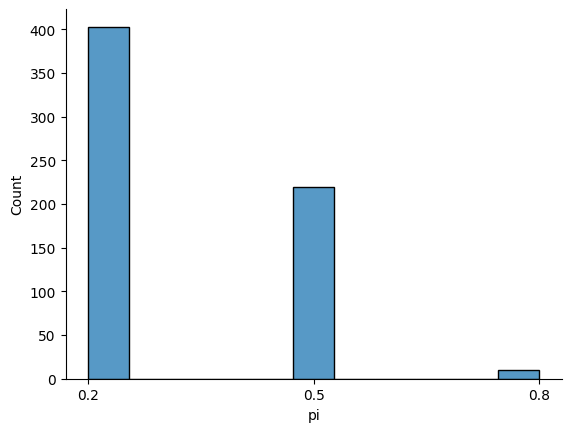

In [15]:
chess_post = chess_sim[chess_sim['y'] == 1]

chess_post_plot = sns.histplot(data = chess_post, x="pi")

#plt.xticks(np.arange(0.2,0.8,0.3))

chess_post_plot.set(xticks=[0.2,0.5,0.8])
sns.despine()

## Part 4: 频率学派与贝叶斯学派的对比

### 频率学派如何看待这个世界？  


在对比频率学派与贝叶斯学派的差异之前，让我们首先回顾一下频率学派是如何看待这个世界的。


![Image Name](https://cdn.kesci.com/upload/image/rhqcgapoeq.png?imageView2/0/w/960/h/960)  


我们假设存在两个城市，其中A城市的平均工资为$6000$元每月，B城市的平均工资为$6500$元每月。  

然后，由于两个城市的人口太多，通过两个城市中所有人的工资去计算平均工作是*费时费力的*。其次，对于‘地球中大陆的占比’的问题，记录所有的陆地和海洋是不太可能的。  

因此，统计学家选择 **抽样** 的方式通过 **样本** 来估计两个城市 **总体** 的均值。

值得注意的是：  

1. 这个例子中两个总体均值的差异(工资差异)是**固定的**，即世界的真相是固定的。然而在真实的“大世界”中，比如人们幸福感上的差异，差异的“真相”是我们想要探索的，未知的。  

2. 通过抽样的方式去估计总体会存在**噪音**或者*偏差*。  

3. 频率学派认为**概率**是噪音的体现。结合前两点，两个城市的差异是固定的，而抽样带来了误差，因此概率代表的是样本能代表总体的概率。  

4. 噪音受到抽样**样本大小**和工资方差**变异**的影响。另一个常见的问题是抽样样本的概率分布与样本大小和总体方差有关，如下图。


![Image Name](https://cdn.kesci.com/upload/image/rhqcnfd9gl.png?imageView2/0/w/480/h/480)  


最后，频率学派如何**推断**出两个总体之间的差异？  
- 由于两个总体间的差异是固定的，因此，判断差异是否显著与噪声大小有关，即信噪比。  
- 频率学派通过零假设的显著性检验(Null hypothesis significant test, NHST)来判断这个显著性。即通过拒绝极端值的方式避免噪音的影响。在数学上通过计算置信区间(confidence interval)和$p$值来帮助推断过程。

### 贝叶斯学派如何看待这个世界？

贝叶斯学派的出现与兴趣在于频率学派所存在的问题。  
主要体现在2个方面：  
1. 世界的真相(差异)可能不是固定的。比如对于复杂世界现象背后的机制是难以确定的。  
2. 通过抽样样本去替代总体容易出现偏差。比如由于抽到极端值从而错误的估计总体。此外，相关的问题还有type Ⅰ错误，统计检验力，*p*-hacking等。

贝叶斯学派提供了另一种角度去解释上述的问题。  

- 首先，贝叶斯学派认为世界的真相不是固定不变的，并且他们通过概率去描述这种变化。比如，两个城市平均工资的差异可能受到各种因素的影响，因此这个差异不是固定的。而两个城市平均工资的差异或可能性，比如这个差异为$500$的概率为$80$%，代表了个体对这个差异的信念**(belief)**，比如有$80$%的把握相信这个差异为$500$。  

- 其次，贝叶斯学派并不是通过NHST来推测这个差异。而是通过贝叶斯公式。需要注意的是，虽然贝叶斯学派认为世界的真相并不是固定的，但总世界中所观测的现象(抽样样本得到的数据)是固定的。因此，对于世界真相的信念可以根据数据进行更新。

#### Thomas Bayes  
![Image Name](https://pic2.zhimg.com/v2-ae48785e2b67af851e236b3d38c78c8d_r.jpg)  


#### Pierre Simon Laplace  

![Image Name](https://th.bing.com/th/id/R.c252b05834293b10a3005882940d6622?rik=Kr8G5HIK%2fObbHw&riu=http%3a%2f%2fimages.fineartamerica.com%2fimages-medium-large%2fpierre-simon-marquis-de-laplace-maria-platt-evans.jpg&ehk=uHIIZ0qdCLmD0FXAHR4lUGfySQGNKlhNkJgoWIOMJG4%3d&risl=&pid=ImgRaw&r=0)  


### 两个学派的差异对比  


|                     | 频率学派   | 贝叶斯学派   |  
| ------------------- | ---------- | ------------ |  
| 世界真相 (参数) | 固定       | 变化         |  
| 概率                | 抽样的噪音 | 信念         |  
| 推断过程            | NHST       | 贝叶斯定理   |  
| 数据                | 存在噪音   | 固定         |  
| 推断可更新性        | 否         | 是           |  
| 主观性              | 前提预设   | 通过先验设定 |

### 贝叶斯的主观性  

**任何统计分析方法都不可能完全客观，因此主观性是一个相对概念:**  

* 贝叶斯学派的主观性通过先验的设定来体现，透明，不易让人产生误解  

* 频率学派的主观性暗含在各种**前提预设**中，比如方差分析中的方差齐性和正态性，这种看似‘客观的’预设，一方面难以满足，一方面也是一种主观的设定。  

* 更为宏观的来说，样本的抽取，数据清理方式的选择，分析方法的选择，$p$值的设定，这些都存在主观性。因此，频率学派并没有想象的那么‘客观’。  

* 主观不一定是坏事：通过量化方法将个体的经验和专家知识整合到数据分析之中。  



#### 重复抽样的不同作用

##### 频率学派  
* 统计推断依赖于参数的**抽样分布**，即只要无限(long-run)的进行抽样，样本分布的参数就会有某种分布形式；  
* NHST中的$p$值和置信区间的解读均依赖于“无限次抽样”的预设；  
* 实际操作中，我们往往只会收集一次数据，并不会反复的进行抽样；有些情境中，预设“无限次重复抽样并不合理；  

##### 贝叶斯学派  
* 假定参数本身是分布，不确定性一起存在于推断之中；  
* 直接根据数据对先验信念进行更新；  

**置信区间(confidence interval) vs 可信区间(credible interval)**  

**No free lunch: 各有优势和缺陷**

#### 不同的先验和似然会产生不同的后验分布  

![Image Name](https://cdn.kesci.com/upload/image/rhqcb9gji7.png?imageView2/0/w/500/h/500)  


#### NHST的"弱项"

* 无法直接对零假设(null hypothesis)进行支持，即如果两个总体没有显著差异，他们的相似程度有多少？  (许岳培等, 2023, *应用心理学*)  

* 一次性只能对比两个总体的假设进行比较；  

* 控制假阳性是一个棘手的问题